In [1]:
import dataloader
import utilities
import features
import transcribe
import evaluate
import matplotlib.pyplot as plt

PATH = "/home/max/ET-TI/Masterarbeit/mirdata/"
gui = dataloader.MIRDatasetGUI(PATH);

Output()

Template based chord recognition approach with a quantized chromagram

(0.8, 0.78)


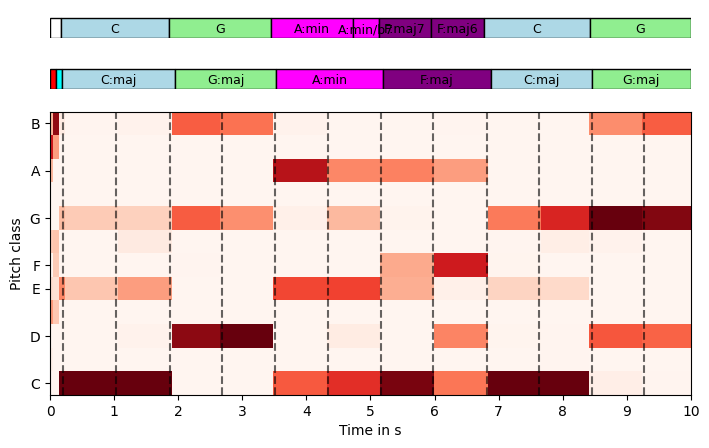

In [3]:
audiopath,(ref_intervals,ref_labels) = gui.getSelectedTrack()
t,sig = utilities.loadAudio(audiopath)
t_chroma, chroma = features.crpChroma(sig,nCRP=30)
beats = features.beats(sig,"RNN")


majmin: 0.8, segmentation: 0.78
triads: 0.74, segmentation: 0.78


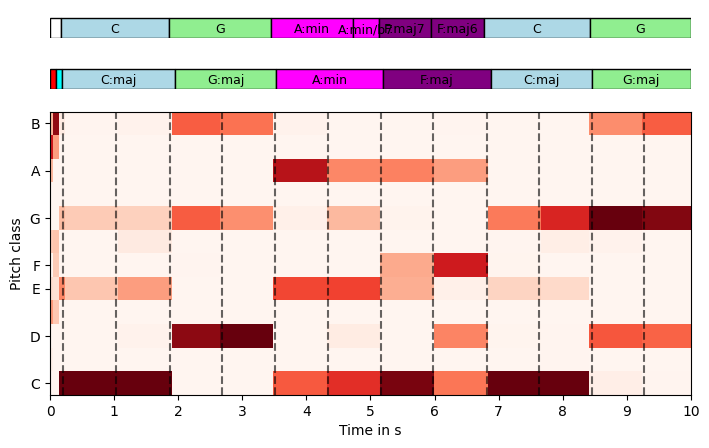

In [5]:
chroma = utilities.smoothChromagram(t_chroma,chroma,beats)
est_intervals,est_labels = transcribe.transcribeWithTemplates(t_chroma,chroma,template_type="majmin")
fig,ax = plt.subplots(3,1,height_ratios=(1,1,10),figsize=(8.27,5))
utilities.plotChordAnnotations(ax[0],(ref_intervals,ref_labels),(0,10))
utilities.plotChordAnnotations(ax[1],(est_intervals,est_labels),(0,10))
utilities.plotChromagram(ax[2],t_chroma,chroma,beats)
ax[2].set_xlim(0,10);
score,seg = evaluate.evaluateTranscription(est_intervals,est_labels,ref_intervals,ref_labels,scheme="majmin")
print(f"majmin: {score}, segmentation: {seg}")
score,seg = evaluate.evaluateTranscription(est_intervals,est_labels,ref_intervals,ref_labels,scheme="triads")
print(f"triads: {score}, segmentation: {seg}")